# Quantum circuit implementation using Qiskit


* **Author**: yeray142 (Yeray C.)
* **Date**: 2023/09/30
* **Updated**: None
* **Version**: 1.0
* **Description**: Custom quantum circuit implemented using Qiskit ML framework.

## Setup

In [1]:
from qiskit.circuit import Parameter, ParameterVector
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

## Quantum circuit

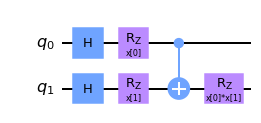

In [7]:
inputs = ParameterVector("input", 2)
x = ParameterVector("x", 4)

qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.rz(x[0], 0)
qc.rz(x[1], 1)
qc.cnot(0, 1) # Same as qc.cx(0, 1)
qc.rz(x[0] * x[1], 1)
qc.draw("mpl")

## Defining a function with the circuit

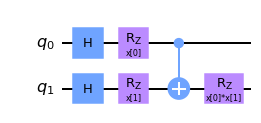

In [10]:
def q_circuit(params):
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.h(1)
    qc.rz(params[0], 0)
    qc.rz(params[1], 1)
    qc.cnot(0, 1) # Same as qc.cx(0, 1)
    qc.rz(params[0] * params[1], 1)
    return qc

x = ParameterVector("x", 4)
circuit = q_circuit(x)
circuit.draw("mpl")

## Defining Feature Map based on our custom quantum circuit

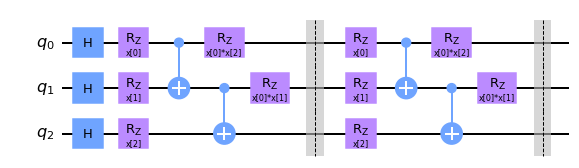

In [30]:
def custom_q_circuit(num_qubits, reps, params):
    qc = QuantumCircuit(num_qubits)

    # Apply the specified number of repetitions
    for qubit in range(num_qubits):
            qc.h(qubit)

    for _ in range(reps):
        for qubit in range(num_qubits):
            qc.rz(params[qubit], qubit)

        for qubit in range(num_qubits - 1):
            qc.cnot(qubit, qubit + 1)

            # TODO: Fix this part
            qc.rz(params[qubit - 1] * params[qubit], qubit)

        qc.barrier()

    return qc

num_qubits = 3
reps = 2
param_vector = ParameterVector("x", num_qubits)  # Modify this list with your parameters
circuit = custom_q_circuit(num_qubits, reps, param_vector)

# Draw the circuit
circuit.draw("mpl")